# Visualising the Topic Modelling Results

This notebook visualises the results from the previous notebook containing topic models across towns and categories. Sentiment scores are applied using VADER to each noun phrase
* Section 1 - Import libraries and dataset
* Section 2 - Data preparation and EDA
* Section 3 - Category analysis for Arun Distict
* Section 4 - Sentiment scores across categories
* Section 5 - Comparing aspects and towns


Datasets need to run notebook:
* topicmodelsaccom.csv
* topicmodelsfood.csv
* topicmodelsattract.csv

Data save to:
* combined_sentiment.csv
* combined_sentiment_test.csv


# Section 1: Import libraries and data

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\imoge\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [118]:
# Read in datasets
df_accom = pd.read_csv("topicmodelsaccom.csv")
df_food = pd.read_csv("topicmodelsfood.csv")
df_attract = pd.read_csv("topicmodelsattract.csv")

df_accom_test = pd.read_csv("topicmodelsaccomtest.csv")
df_food_test = pd.read_csv("topicmodelsfoodtest.csv")
df_attract_test = pd.read_csv("topicmodelsattracttest.csv")

In [119]:
# Add the category columns to the test dataframes
df_accom_test["Category"] = "Accommodation"
df_food_test["Category"] = "Food"
df_attract_test["Category"] = "Attract"

# Section 2: Data Preparation and EDA

In [120]:
# Convert sentiment score to positive to negative with VADER (above 0.05 positive, below -0.05 negative and between is 
# neutral as per the VADER notes)
sid = SentimentIntensityAnalyzer()

def polar(x): 
    if x >= 0.05:
        return 'positive'
    elif x <0.05 and x>= -0.05:
        return 'neutral'
    else:
        return 'negative'

In [121]:
def sent(df):
    df["Sentiment"] = df["noun_phrases"].apply(lambda x: sid.polarity_scores(x)["compound"])
    df["Score"] = df["Sentiment"].apply(lambda x: polar(x))

In [122]:
# Run function to get sentiment and convert to 'positive','negative' and 'neutral'
sent(df_accom)
sent(df_food)
sent(df_attract)
sent(df_accom_test)
sent(df_food_test)
sent(df_attract_test)

In [123]:
print(df_accom.shape,df_accom_test.shape,df_food.shape, df_food_test.shape, df_attract.shape,df_attract_test.shape)

(24021, 13) (649, 12) (39635, 13) (952, 12) (7560, 13) (210, 12)


In [124]:
combined_sentiment = pd.concat([df_accom,df_food,df_attract],axis = 0,ignore_index = True)
combined_sentiment_test = pd.concat([df_accom_test,df_food_test,df_attract_test],axis = 0,ignore_index = True)
combined_sentiment.to_csv("combined_sentiment.csv")
combined_sentiment_test.to_csv("combined_sentiment_test.csv")

In [125]:
df_accom["Score"].value_counts()

neutral     13483
positive     8886
negative     1652
Name: Score, dtype: int64

In [126]:
df_food["Score"].value_counts()

neutral     20566
positive    16804
negative     2265
Name: Score, dtype: int64

In [127]:
df_attract["Score"].value_counts()

neutral     4077
positive    3132
negative     351
Name: Score, dtype: int64

In [128]:
# Plot review noun phrase counts per category
def counts(df,name):
    
    df_count = df["Topic Count"].value_counts().reset_index()
    df_count.columns = ["Topic","Count"]
    #df_count.sort_values("Topic",ascending = False,inplace = True)
    fig, ax = plt.subplots()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title("Number of Review Noun Phrases By Aspect: " + name,fontsize = 10)
    ax.set_xlabel("Number",fontsize = 8,labelpad = 10)
    ax.barh(df_count["Topic"],df_count["Count"],color = "lightsteelblue")
    ax.invert_yaxis()
    plt.show()
    

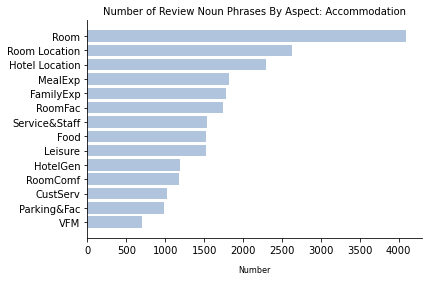

In [129]:
counts(df_accom,"Accommodation")

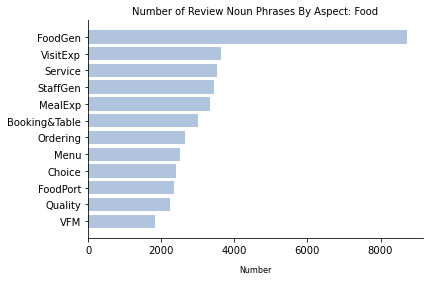

In [130]:
counts(df_food, "Food")

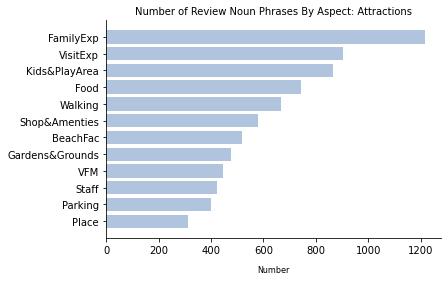

In [131]:
counts(df_attract,"Attractions")

Comments:

* Unsurprisingly, the most reviewed category for accommodation and Food is 'Rooms' and 'Food'
* The most reviewed aspect for Attractions is the quality of the 'Family Experience'
* Interestingly, the lowest number of review phrases are for value for money for the first two categories

# Section 3: Category Analysis

In [132]:
# Numbers of aspects split into positive and negative into one dataframe

def aspect_all(df):
    
    pos_df = df[df["Score"] == "positive"]
    neg_df = df[df["Score"] == "negative"]
    pos_df = pd.DataFrame(pos_df["Topic Count"].value_counts())
    neg_df = pd.DataFrame(neg_df["Topic Count"].value_counts())
    pos_df.columns = ["Num Pos"]
    neg_df.columns = ["Num Neg"]
    df_sent = pd.concat([pos_df,neg_df],axis = 1)
    df_sent["%Pos"] = round(df_sent["Num Pos"]/(df_sent["Num Pos"] + df_sent["Num Neg"]),2)*100
    df_sent["%Neg"] = round(df_sent["Num Neg"]/(df_sent["Num Pos"] + df_sent["Num Neg"]),2)*100
    df_sent.sort_index(inplace = True)
    return df_sent
    

In [133]:
def graph_sentiment_numbers(name,df):
    
    labels = list(df.index)
    pos = list(df["%Pos"])
    neg = list(df["%Neg"]*-1)

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize = (10,6))
    ax.barh(x - width/2, pos, width, label='Pos',color = "lightsteelblue")
    ax.barh(x + width/2, neg, width, label='Neg',color = "slategrey")

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_title(name + " - % Positive and Negative")
    ax.set_yticks(x)
    ax.set_yticklabels(labels)
    #("% of Aspect")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend(frameon = False, loc = "best")
    ax.invert_yaxis()

    fig.tight_layout()

    plt.show()

## Accomodation

In [134]:
accom_sent = aspect_all(df_accom)
accom_sent

,Num Pos,Num Neg,%Pos,%Neg
CustServ,409,103,80.0,20.0
FamilyExp,761,94,89.0,11.0
Food,725,76,91.0,9.0
Hotel Location,856,117,88.0,12.0
HotelGen,395,50,89.0,11.0
Leisure,406,87,82.0,18.0
MealExp,510,144,78.0,22.0
Parking&Fac,215,92,70.0,30.0
Room,1537,304,83.0,17.0
Room Location,702,232,75.0,25.0


Review noun phrases are predominantly positive, with the highest % positive relating to the Family Experience and the lowest to Parking & Other Facilities

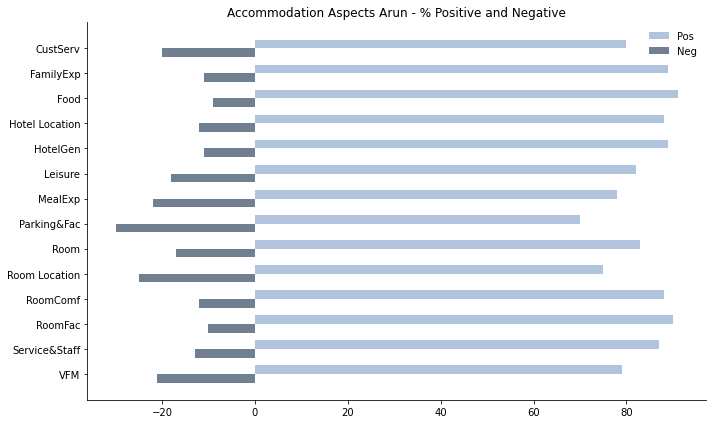

In [135]:
graph_sentiment_numbers("Accommodation Aspects Arun",accom_sent)

### Split down by town

In [136]:
arundel_accom_aspects_pos = df_accom[(df_accom["Town"] == "Arundel") & (df_accom["Score"] == "positive")]
arundel_accom_aspects_neg = df_accom[(df_accom["Town"] == "Bognor") & (df_accom["Score"] == "negative")]
bognor_accom_aspects_pos = df_accom[(df_accom["Town"] == "Bognor") & (df_accom["Score"] == "positive")]
bognor_accom_aspects_neg = df_accom[(df_accom["Town"] == "Bognor") & (df_accom["Score"] == "negative")]
little_accom_aspects_pos = df_accom[(df_accom["Town"] == "Littlehampton") & (df_accom["Score"] == "positive")]
little_accom_aspects_neg = df_accom[(df_accom["Town"] == "Littlehampton") & (df_accom["Score"] == "negative")]

In [137]:
# Create dataframe to compare percentages for each aspect for the town
def aspect_perc(df1,df2):
    df_pos = pd.DataFrame(df1["Topic Count"].value_counts())
    df_neg = pd.DataFrame(df2["Topic Count"].value_counts())
    df_comb = pd.concat([df_pos,df_neg],axis = 1)
    df_comb.columns = ["Num Pos","Num Neg"]
    df_comb["%Pos"] = round(df_comb["Num Pos"]/(df_comb["Num Pos"] + df_comb["Num Neg"]),2)*100
    df_comb["%Neg"] = round(df_comb["Num Neg"]/(df_comb["Num Neg"] + df_comb["Num Pos"]),2)*100
    df_comb.sort_index(inplace = True)
    
    return df_comb


### Arundel

In [138]:
arundel_percent = aspect_perc(arundel_accom_aspects_pos,arundel_accom_aspects_neg)
arundel_percent

,Num Pos,Num Neg,%Pos,%Neg
CustServ,126,49,72.0,28.0
FamilyExp,143,58,71.0,29.0
Food,256,38,87.0,13.0
Hotel Location,290,66,81.0,19.0
HotelGen,174,22,89.0,11.0
Leisure,48,64,43.0,57.0
MealExp,159,54,75.0,25.0
Parking&Fac,48,32,60.0,40.0
Room,541,171,76.0,24.0
Room Location,193,136,59.0,41.0


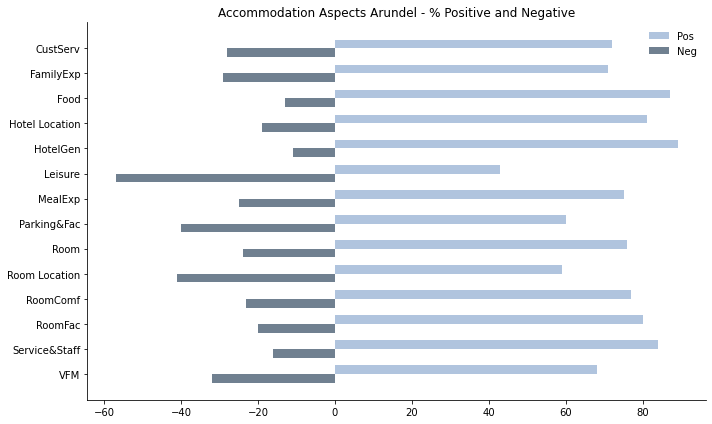

In [139]:
graph_sentiment_numbers("Accommodation Aspects Arundel",arundel_percent)

### Bognor

In [140]:
bognor_percent = aspect_perc(bognor_accom_aspects_pos,bognor_accom_aspects_neg)
bognor_percent

,Num Pos,Num Neg,%Pos,%Neg
CustServ,172,49,78.0,22.0
FamilyExp,474,58,89.0,11.0
Food,322,38,89.0,11.0
Hotel Location,317,66,83.0,17.0
HotelGen,134,22,86.0,14.0
Leisure,284,64,82.0,18.0
MealExp,219,54,80.0,20.0
Parking&Fac,80,32,71.0,29.0
Room,677,171,80.0,20.0
Room Location,353,136,72.0,28.0


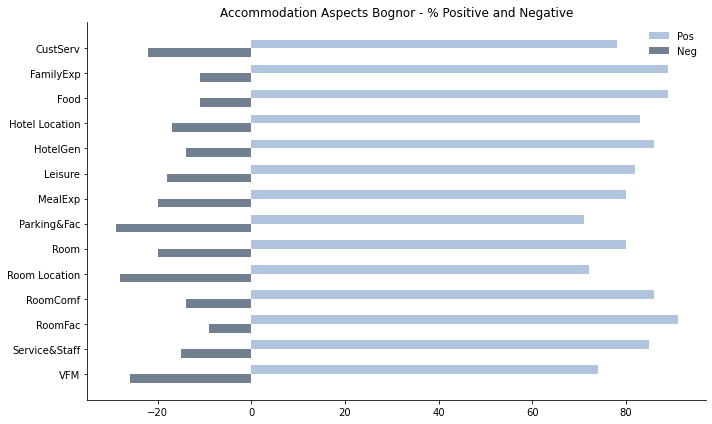

In [141]:
graph_sentiment_numbers("Accommodation Aspects Bognor",bognor_percent)

### Littlehampton

In [142]:
little_percent = aspect_perc(little_accom_aspects_pos,little_accom_aspects_neg)
little_percent

,Num Pos,Num Neg,%Pos,%Neg
CustServ,111,29,79.0,21.0
FamilyExp,144,18,89.0,11.0
Food,147,19,89.0,11.0
Hotel Location,249,23,92.0,8.0
HotelGen,87,7,93.0,7.0
Leisure,74,10,88.0,12.0
MealExp,132,37,78.0,22.0
Parking&Fac,87,23,79.0,21.0
Room,319,51,86.0,14.0
Room Location,156,44,78.0,22.0


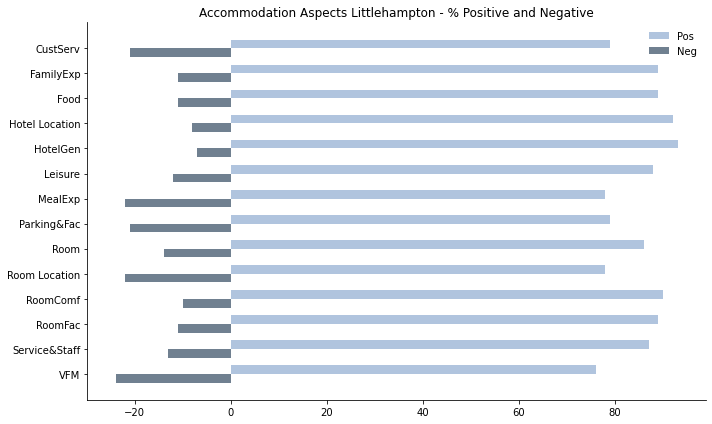

In [143]:
graph_sentiment_numbers("Accommodation Aspects Littlehampton",little_percent)

### Food

In [144]:
food_sent = aspect_all(df_food)
food_sent

,Num Pos,Num Neg,%Pos,%Neg
Booking&Table,926,234,80.0,20.0
Choice,780,92,89.0,11.0
FoodGen,4540,486,90.0,10.0
FoodPort,663,92,88.0,12.0
MealExp,1246,156,89.0,11.0
Menu,743,84,90.0,10.0
Ordering,888,111,89.0,11.0
Quality,852,121,88.0,12.0
Service,1928,302,86.0,14.0
StaffGen,1800,251,88.0,12.0


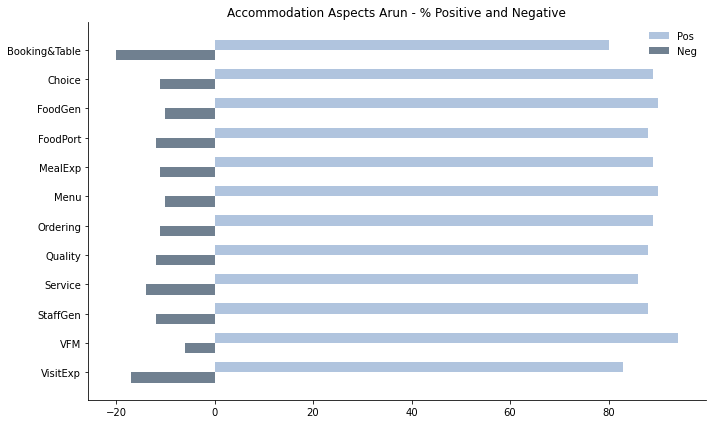

In [145]:
graph_sentiment_numbers("Accommodation Aspects Arun",food_sent)

### Split down by town

In [146]:
arundel_food_aspects_pos = df_food[(df_food["Town"] == "Arundel") & (df_food["Score"] == "positive")]
arundel_food_aspects_neg = df_food[(df_food["Town"] == "Bognor") & (df_food["Score"] == "negative")]
bognor_food_aspects_pos = df_food[(df_food["Town"] == "Bognor") & (df_food["Score"] == "positive")]
bognor_food_aspects_neg = df_food[(df_food["Town"] == "Bognor") & (df_food["Score"] == "negative")]
little_food_aspects_pos = df_food[(df_food["Town"] == "Littlehampton") & (df_food["Score"] == "positive")]
little_food_aspects_neg = df_food[(df_food["Town"] == "Littlehampton") & (df_food["Score"] == "negative")]

### Arundel

In [147]:
arundel_percent_food = aspect_perc(arundel_food_aspects_pos,arundel_food_aspects_neg)
arundel_percent_food

,Num Pos,Num Neg,%Pos,%Neg
Booking&Table,359,80,82.0,18.0
Choice,304,22,93.0,7.0
FoodGen,1625,185,90.0,10.0
FoodPort,214,29,88.0,12.0
MealExp,418,50,89.0,11.0
Menu,287,29,91.0,9.0
Ordering,379,42,90.0,10.0
Quality,299,45,87.0,13.0
Service,634,111,85.0,15.0
StaffGen,664,84,89.0,11.0


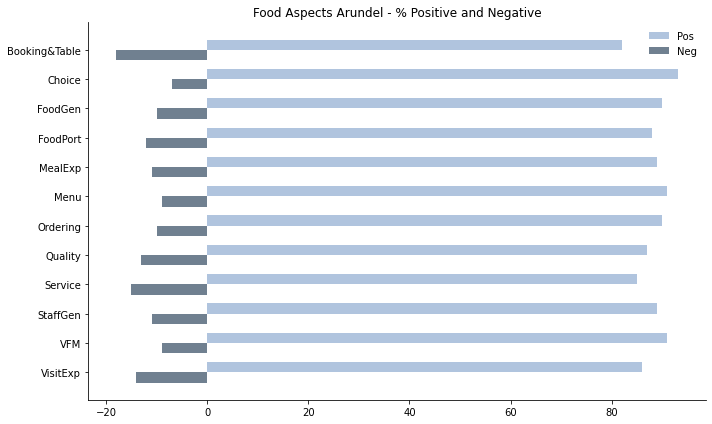

In [148]:
graph_sentiment_numbers("Food Aspects Arundel",arundel_percent_food)

### Bognor

In [149]:
bognor_percent_food = aspect_perc(bognor_food_aspects_pos,bognor_food_aspects_neg)
bognor_percent_food

,Num Pos,Num Neg,%Pos,%Neg
Booking&Table,249,80,76.0,24.0
Choice,262,22,92.0,8.0
FoodGen,1646,185,90.0,10.0
FoodPort,244,29,89.0,11.0
MealExp,454,50,90.0,10.0
Menu,235,29,89.0,11.0
Ordering,286,42,87.0,13.0
Quality,283,45,86.0,14.0
Service,769,111,87.0,13.0
StaffGen,647,84,89.0,11.0


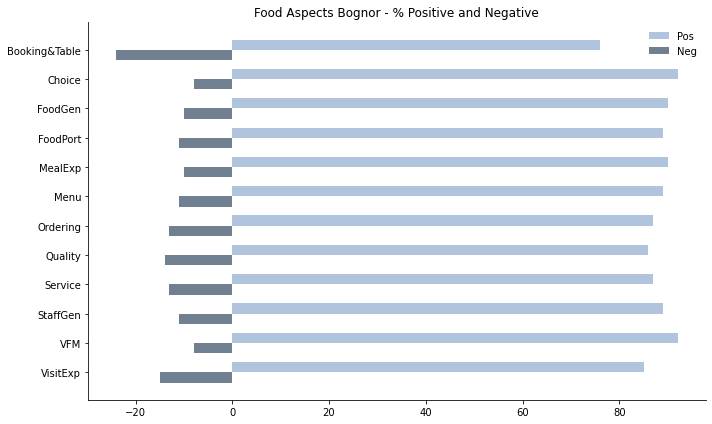

In [150]:
graph_sentiment_numbers("Food Aspects Bognor",bognor_percent_food)

### Littlehampton

In [151]:
little_percent_food = aspect_perc(little_food_aspects_pos,little_food_aspects_neg)
little_percent_food

,Num Pos,Num Neg,%Pos,%Neg
Booking&Table,318,74,81.0,19.0
Choice,214,40,84.0,16.0
FoodGen,1269,166,88.0,12.0
FoodPort,205,32,86.0,14.0
MealExp,374,64,85.0,15.0
Menu,221,28,89.0,11.0
Ordering,223,31,88.0,12.0
Quality,270,43,86.0,14.0
Service,525,101,84.0,16.0
StaffGen,489,87,85.0,15.0


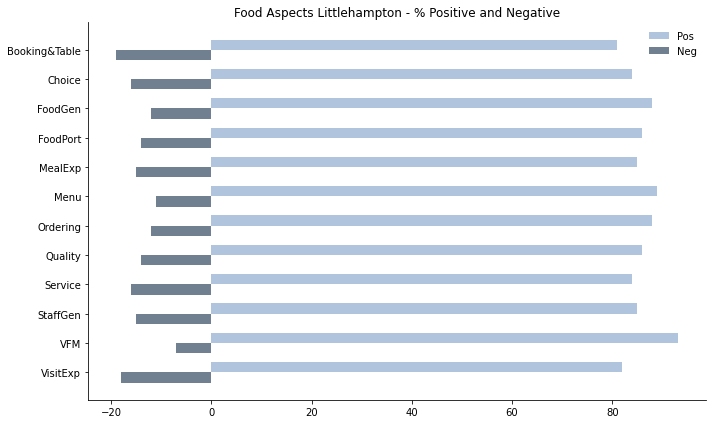

In [152]:
graph_sentiment_numbers("Food Aspects Littlehampton",little_percent_food)

### Attractions

In [153]:
attract_sent = aspect_all(df_attract)
attract_sent

,Num Pos,Num Neg,%Pos,%Neg
BeachFac,224,20,92.0,8.0
FamilyExp,480,36,93.0,7.0
Food,286,40,88.0,12.0
Gardens&Grounds,222,16,93.0,7.0
Kids&PlayArea,283,61,82.0,18.0
Parking,131,19,87.0,13.0
Place,168,16,91.0,9.0
Shop&Amenties,231,19,92.0,8.0
Staff,210,22,91.0,9.0
VFM,222,45,83.0,17.0


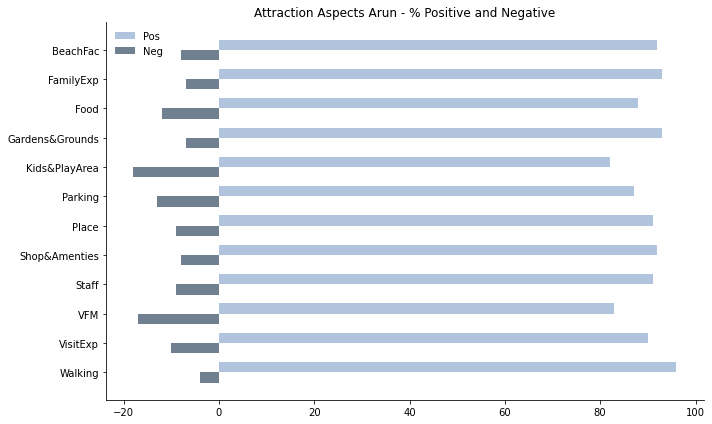

In [154]:
graph_sentiment_numbers("Attraction Aspects Arun",attract_sent)

## Split down by town

In [155]:
arundel_attract_aspects_pos = df_attract[(df_attract["Town"] == "Arundel") & (df_attract["Score"] == "positive")]
arundel_attract_aspects_neg = df_attract[(df_attract["Town"] == "Bognor") & (df_attract["Score"] == "negative")]
bognor_attract_aspects_pos = df_attract[(df_attract["Town"] == "Bognor") & (df_attract["Score"] == "positive")]
bognor_attract_aspects_neg = df_attract[(df_attract["Town"] == "Bognor") & (df_attract["Score"] == "negative")]
little_attract_aspects_pos = df_attract[(df_attract["Town"] == "Littlehampton") & (df_attract["Score"] == "positive")]
little_attract_aspects_neg = df_attract[(df_attract["Town"] == "Littlehampton") & (df_attract["Score"] == "negative")]

### Arundel

In [156]:
arundel_percent_attract = aspect_perc(arundel_attract_aspects_pos,arundel_attract_aspects_neg)
arundel_percent_attract

,Num Pos,Num Neg,%Pos,%Neg
BeachFac,101,14,88.0,12.0
FamilyExp,264,9,97.0,3.0
Food,153,5,97.0,3.0
Gardens&Grounds,199,2,99.0,1.0
Kids&PlayArea,167,17,91.0,9.0
Parking,50,6,89.0,11.0
Place,94,5,95.0,5.0
Shop&Amenties,149,7,96.0,4.0
Staff,118,5,96.0,4.0
VFM,64,26,71.0,29.0


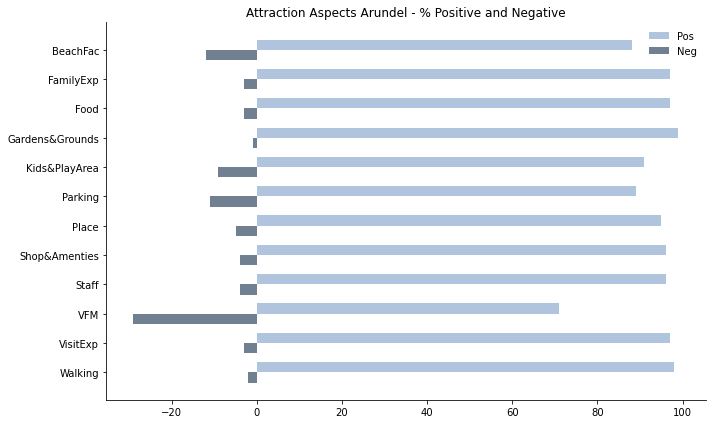

In [157]:
graph_sentiment_numbers("Attraction Aspects Arundel",arundel_percent_attract)

### Bognor

In [158]:
bognor_percent_attract = aspect_perc(bognor_attract_aspects_pos,bognor_attract_aspects_neg)
bognor_percent_attract

,Num Pos,Num Neg,%Pos,%Neg
BeachFac,40,14,74.0,26.0
FamilyExp,144,9,94.0,6.0
Food,85,5,94.0,6.0
Gardens&Grounds,16,2,89.0,11.0
Kids&PlayArea,57,17,77.0,23.0
Parking,64,6,91.0,9.0
Place,49,5,91.0,9.0
Shop&Amenties,47,7,87.0,13.0
Staff,53,5,91.0,9.0
VFM,120,26,82.0,18.0


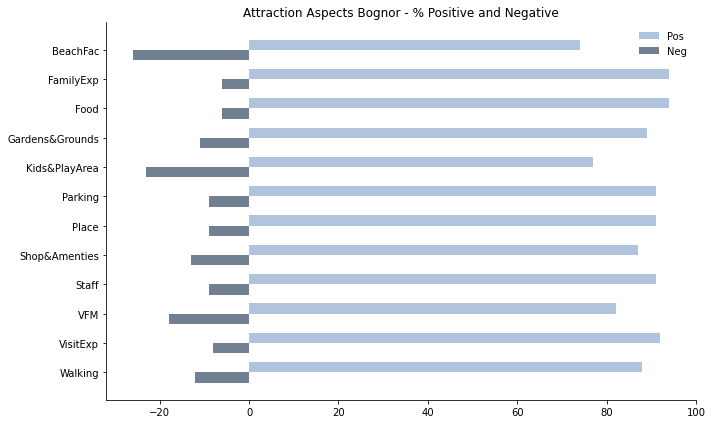

In [159]:
graph_sentiment_numbers("Attraction Aspects Bognor",bognor_percent_attract)

### Littlehampton

In [160]:
little_percent_attract = aspect_perc(little_attract_aspects_pos,little_attract_aspects_neg)
little_percent_attract

,Num Pos,Num Neg,%Pos,%Neg
BeachFac,83,4,95.0,5.0
FamilyExp,72,8,90.0,10.0
Food,48,12,80.0,20.0
Gardens&Grounds,7,1,88.0,12.0
Kids&PlayArea,59,5,92.0,8.0
Parking,17,4,81.0,19.0
Place,25,3,89.0,11.0
Shop&Amenties,35,7,83.0,17.0
Staff,39,6,87.0,13.0
VFM,38,9,81.0,19.0


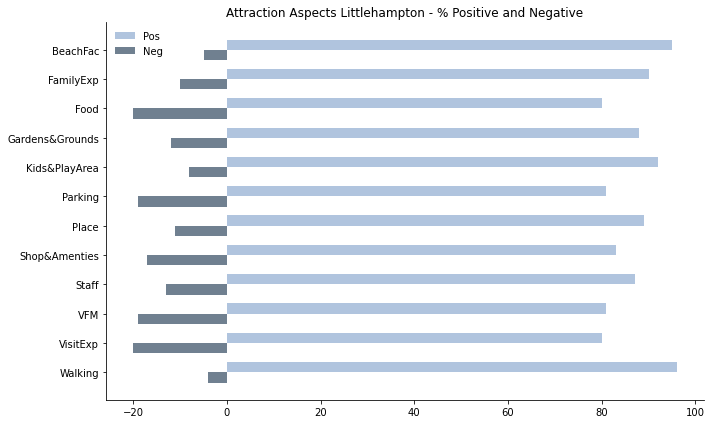

In [161]:
graph_sentiment_numbers("Attraction Aspects Littlehampton",little_percent_attract)

# Section 4: Sentiment Scores across categories

Across the district, what aspects were people most positive about?

## Accommodation

In [162]:
accom_summary = df_accom[df_accom["Sentiment"]!=0].groupby("Topic Count",as_index = False)["Sentiment"].mean()
accom_summary = accom_summary.sort_values(by = "Sentiment",ascending = False)
accom_summary

,Topic Count,Sentiment
2,Food,0.438635
1,FamilyExp,0.435185
3,Hotel Location,0.424734
4,HotelGen,0.416914
12,Service&Staff,0.415473
11,RoomFac,0.404663
13,VFM,0.370602
10,RoomComf,0.365584
8,Room,0.352190
0,CustServ,0.338264


In [163]:
def plot_sent_score(df,name,name2):
    
    labels = list(df["Topic Count"])
    sent = list(df["Sentiment"])
  
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize = (10,7))
    ax.barh(x, sent, width, label='Sentiment Score',color = "lightsteelblue",ec = "grey")
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_title(name + " - Mean Sentiment Score " + name2)
    ax.set_yticks(x)
    ax.set_yticklabels(labels)
    ax.set_xlabel("Mean Sentiment Score",labelpad = 15)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend(frameon = False, loc = "best")
    ax.invert_yaxis()

    fig.tight_layout()

    plt.show()

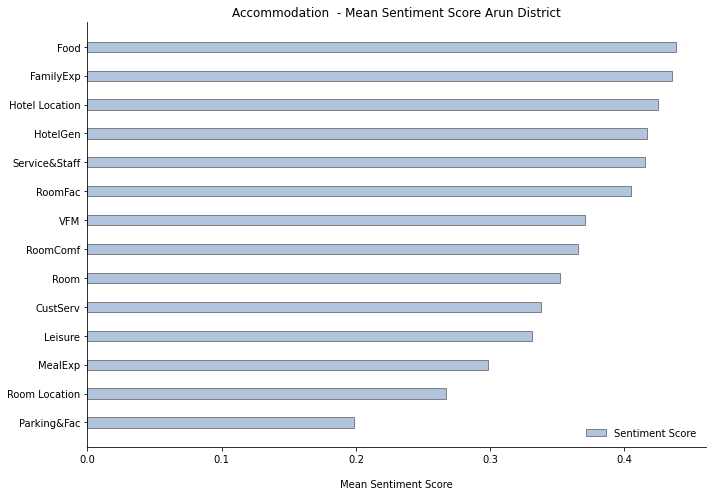

In [164]:
plot_sent_score(accom_summary,"Accommodation ","Arun District")

In [165]:
food_summary = df_food[df_food["Sentiment"]!=0].groupby("Topic Count",as_index = False)["Sentiment"].mean()
food_summary = food_summary.sort_values(by = "Sentiment",ascending = False)
food_summary

,Topic Count,Sentiment
10,VFM,0.540675
2,FoodGen,0.446249
1,Choice,0.428766
9,StaffGen,0.424771
8,Service,0.422962
5,Menu,0.421966
6,Ordering,0.420272
4,MealExp,0.410281
7,Quality,0.402397
3,FoodPort,0.391006


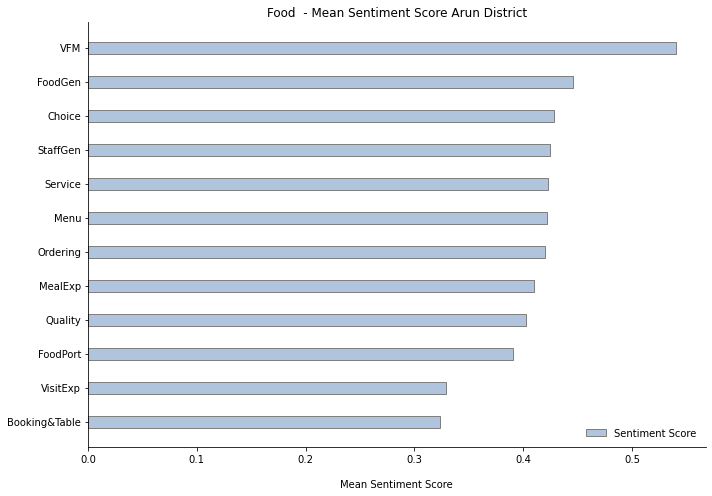

In [166]:
plot_sent_score(food_summary,"Food ","Arun District")

In [167]:
attract_summary = df_attract[df_attract["Sentiment"]!=0].groupby("Topic Count",as_index = False)["Sentiment"].mean()
attract_summary = attract_summary.sort_values(by = "Sentiment",ascending = False)
attract_summary

,Topic Count,Sentiment
3,Gardens&Grounds,0.496514
11,Walking,0.479119
1,FamilyExp,0.472791
6,Place,0.467246
8,Staff,0.458141
7,Shop&Amenties,0.448306
0,BeachFac,0.427939
9,VFM,0.411248
5,Parking,0.403346
2,Food,0.400696


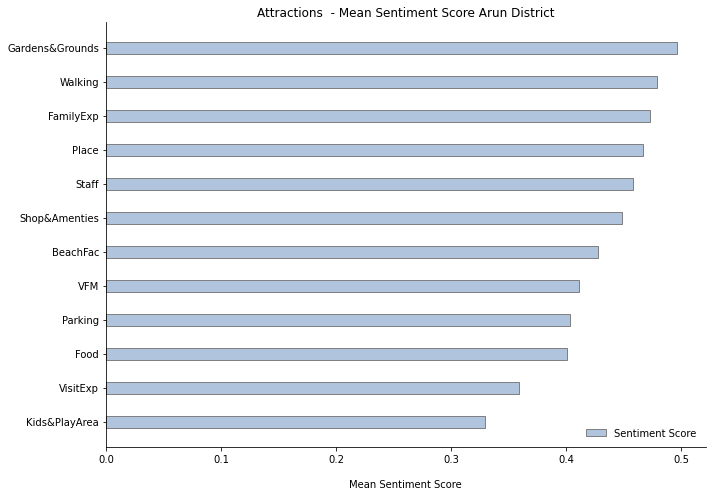

In [168]:
plot_sent_score(attract_summary,"Attractions ","Arun District")

# Section 5: Mean Sentiment Score Analysis By Town

## Accommodation

In [169]:
towns_accom = df_accom.groupby(["Topic Count","Town"],as_index = False)["Sentiment"].mean()
arundel_accom = towns_accom[towns_accom["Town"] == "Arundel"]
bognor_accom = towns_accom[towns_accom["Town"] == "Bognor"]
little_accom = towns_accom[towns_accom["Town"] == "Littlehampton"]

### Arundel

In [170]:
arundel_accom = arundel_accom.sort_values(by = "Sentiment",ascending = False)
arundel_accom

,Topic Count,Town,Sentiment
36,Service&Staff,Arundel,0.311273
39,VFM,Arundel,0.297710
6,Food,Arundel,0.253035
9,Hotel Location,Arundel,0.223206
3,FamilyExp,Arundel,0.208036
30,RoomComf,Arundel,0.197363
0,CustServ,Arundel,0.192557
24,Room,Arundel,0.192160
12,HotelGen,Arundel,0.183317
33,RoomFac,Arundel,0.146265


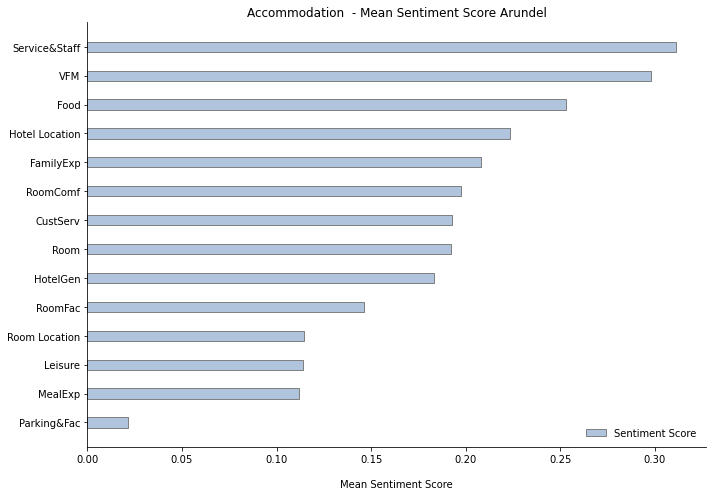

In [171]:
plot_sent_score(arundel_accom,"Accommodation ","Arundel")

### Bognor

In [172]:
bognor_accom = bognor_accom.sort_values(by = "Sentiment",ascending = False)
bognor_accom

,Topic Count,Town,Sentiment
37,Service&Staff,Bognor,0.228573
7,Food,Bognor,0.213183
4,FamilyExp,Bognor,0.202950
34,RoomFac,Bognor,0.184563
31,RoomComf,Bognor,0.174106
40,VFM,Bognor,0.162288
1,CustServ,Bognor,0.155952
10,Hotel Location,Bognor,0.145428
25,Room,Bognor,0.133154
13,HotelGen,Bognor,0.111161


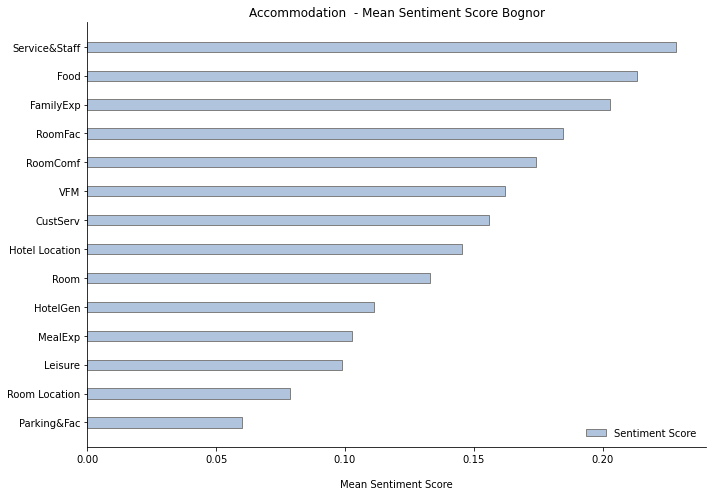

In [173]:
plot_sent_score(bognor_accom,"Accommodation ","Bognor")

### Littlehampton

In [174]:
little_accom = little_accom.sort_values(by = "Sentiment",ascending = False)
little_accom

,Topic Count,Town,Sentiment
38,Service&Staff,Littlehampton,0.274340
8,Food,Littlehampton,0.239644
5,FamilyExp,Littlehampton,0.238921
41,VFM,Littlehampton,0.219180
14,HotelGen,Littlehampton,0.211793
32,RoomComf,Littlehampton,0.207007
11,Hotel Location,Littlehampton,0.188868
35,RoomFac,Littlehampton,0.175477
2,CustServ,Littlehampton,0.174222
26,Room,Littlehampton,0.173105


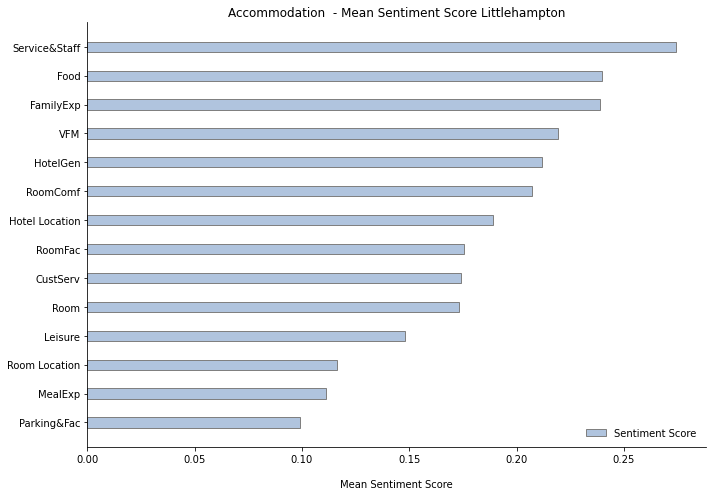

In [175]:
plot_sent_score(little_accom,"Accommodation ","Littlehampton")

## Food

In [176]:
towns_food  = df_food.groupby(["Topic Count","Town"],as_index = False)["Sentiment"].mean()
arundel_food = towns_food[towns_food["Town"] == "Arundel"]
bognor_food = towns_food[towns_food["Town"] == "Bognor"]
little_food = towns_food[towns_food["Town"] == "Littlehampton"]

### Arundel

In [177]:
arundel_food = arundel_food.sort_values(by = "Sentiment",ascending = False)
arundel_food

,Topic Count,Town,Sentiment
30,VFM,Arundel,0.379201
6,FoodGen,Arundel,0.274739
24,Service,Arundel,0.274608
27,StaffGen,Arundel,0.271117
18,Ordering,Arundel,0.186605
12,MealExp,Arundel,0.182291
21,Quality,Arundel,0.177680
3,Choice,Arundel,0.176789
15,Menu,Arundel,0.153873
33,VisitExp,Arundel,0.144686


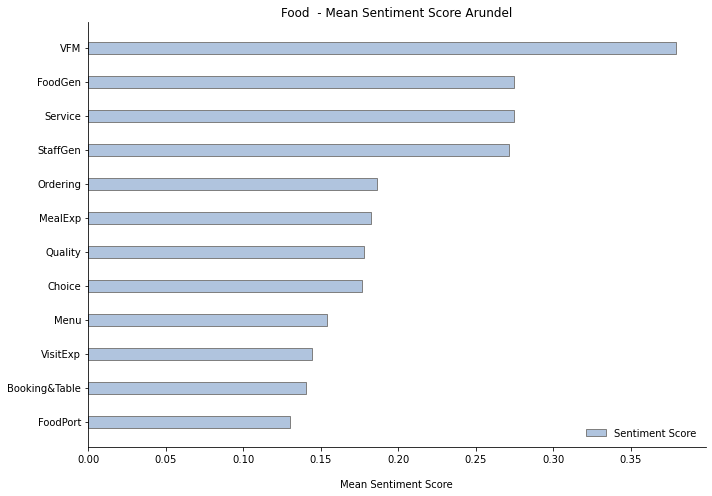

In [178]:
plot_sent_score(arundel_food,"Food ","Arundel")

### Bognor

In [179]:
bognor_food = bognor_food.sort_values(by = "Sentiment",ascending = False)
bognor_food

,Topic Count,Town,Sentiment
31,VFM,Bognor,0.360649
25,Service,Bognor,0.278278
7,FoodGen,Bognor,0.259457
28,StaffGen,Bognor,0.258220
13,MealExp,Bognor,0.175074
22,Quality,Bognor,0.170732
4,Choice,Bognor,0.155043
19,Ordering,Bognor,0.151991
34,VisitExp,Bognor,0.143843
10,FoodPort,Bognor,0.129996


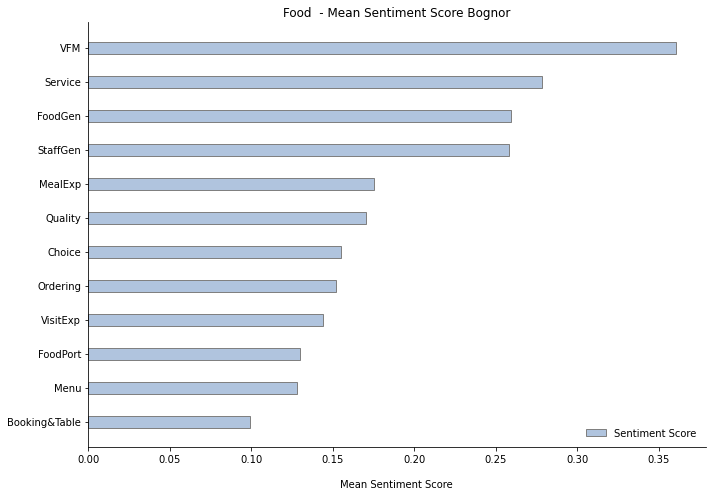

In [180]:
plot_sent_score(bognor_food,"Food ","Bognor")

### Littlehampton

In [181]:
little_food = little_food.sort_values(by = "Sentiment",ascending = False)
little_food

,Topic Count,Town,Sentiment
32,VFM,Littlehampton,0.350988
26,Service,Littlehampton,0.246495
8,FoodGen,Littlehampton,0.235582
29,StaffGen,Littlehampton,0.224738
23,Quality,Littlehampton,0.179128
14,MealExp,Littlehampton,0.160869
17,Menu,Littlehampton,0.135250
2,Booking&Table,Littlehampton,0.132567
5,Choice,Littlehampton,0.130308
20,Ordering,Littlehampton,0.129353


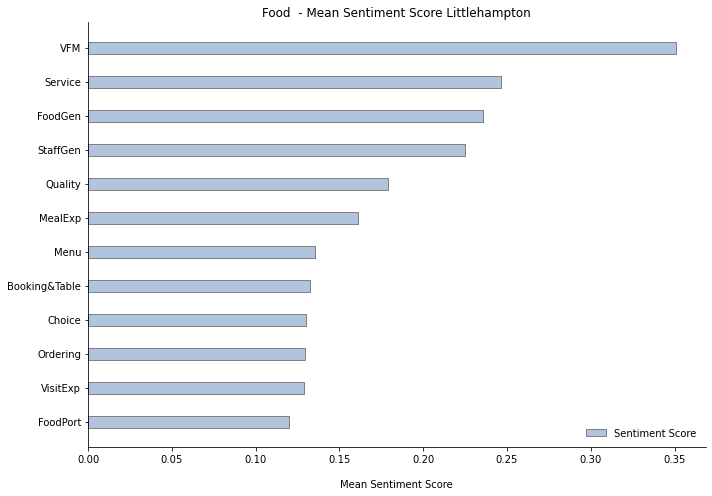

In [182]:
plot_sent_score(little_food,"Food ","Littlehampton")

## Attractions

In [183]:
towns_attract  = df_attract.groupby(["Topic Count","Town"],as_index = False)["Sentiment"].mean()
arundel_attract = towns_attract[towns_attract["Town"] == "Arundel"]
bognor_attract = towns_attract[towns_attract["Town"] == "Bognor"]
little_attract = towns_attract[towns_attract["Town"] == "Littlehampton"]

### Arundel

In [184]:
arundel_attract = arundel_attract.sort_values(by = "Sentiment",ascending = False)
arundel_attract

,Topic Count,Town,Sentiment
18,Place,Arundel,0.262001
27,VFM,Arundel,0.259607
24,Staff,Arundel,0.252518
0,BeachFac,Arundel,0.251528
9,Gardens&Grounds,Arundel,0.251039
33,Walking,Arundel,0.219825
21,Shop&Amenties,Arundel,0.213451
3,FamilyExp,Arundel,0.181633
30,VisitExp,Arundel,0.174887
6,Food,Arundel,0.165154


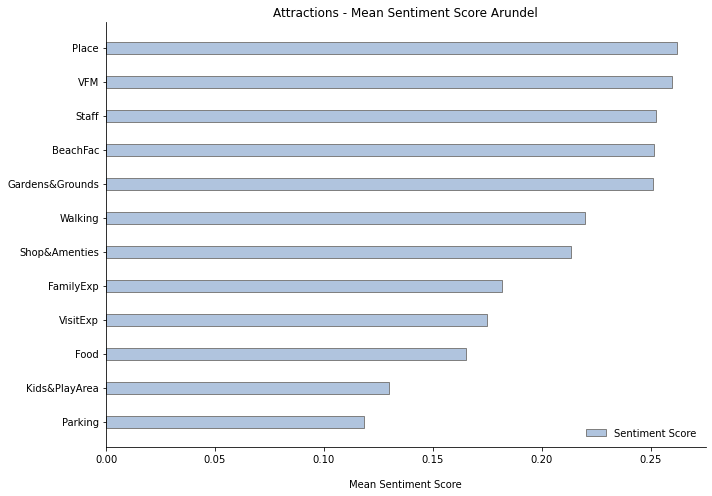

In [185]:
plot_sent_score(arundel_attract,"Attractions","Arundel")

### Bognor

In [186]:
bognor_attract = bognor_attract.sort_values(by = "Sentiment",ascending = False)
bognor_attract

,Topic Count,Town,Sentiment
19,Place,Bognor,0.319507
25,Staff,Bognor,0.267900
28,VFM,Bognor,0.265105
4,FamilyExp,Bognor,0.231025
16,Parking,Bognor,0.228730
7,Food,Bognor,0.215850
10,Gardens&Grounds,Bognor,0.213837
31,VisitExp,Bognor,0.184590
22,Shop&Amenties,Bognor,0.174471
34,Walking,Bognor,0.150040


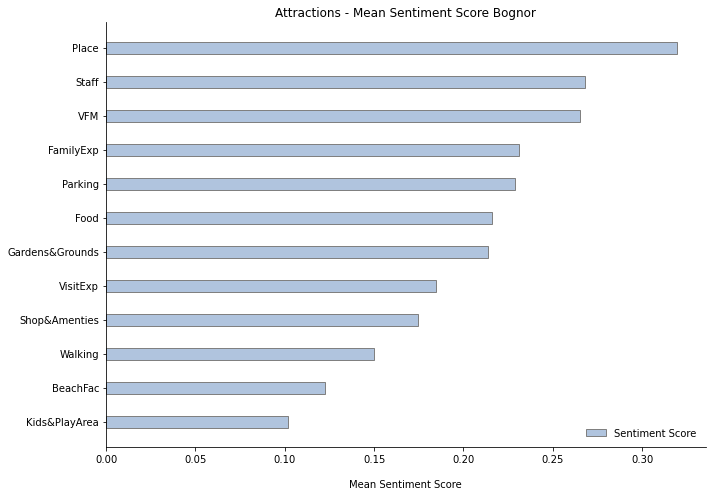

In [187]:
plot_sent_score(bognor_attract,"Attractions","Bognor")

### Littlehampton

In [188]:
little_attract = little_attract.sort_values(by = "Sentiment",ascending = False)
little_attract

,Topic Count,Town,Sentiment
20,Place,Littlehampton,0.251439
11,Gardens&Grounds,Littlehampton,0.232840
5,FamilyExp,Littlehampton,0.222836
26,Staff,Littlehampton,0.222409
35,Walking,Littlehampton,0.219509
2,BeachFac,Littlehampton,0.202412
29,VFM,Littlehampton,0.183855
14,Kids&PlayArea,Littlehampton,0.181758
32,VisitExp,Littlehampton,0.162516
8,Food,Littlehampton,0.152714


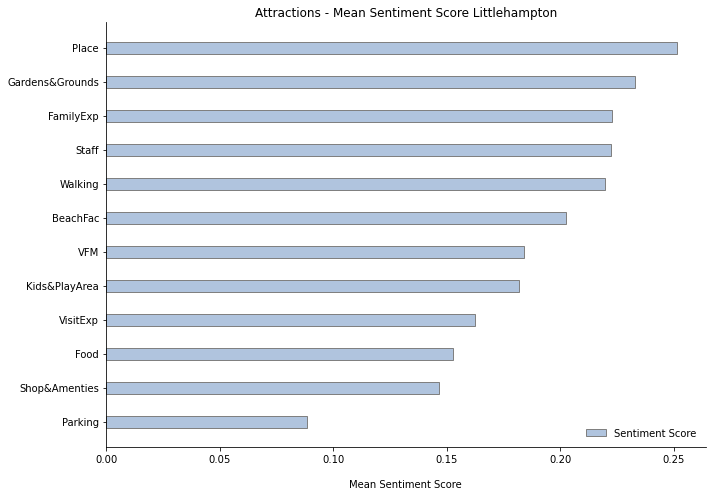

In [189]:
plot_sent_score(little_attract,"Attractions","Littlehampton")

# Section 5: Comparing Aspects and Towns Together

In [210]:
def compare_towns(df1,df2,df3,name):
    
    # Set variables
    labels = list(df1["Topic Count"])
    
    y1 = list(df1["Sentiment"])
    y2 = list(df2["Sentiment"])
    y3 = list(df3["Sentiment"])
    height = 0.25
    
    r1 = np.arange(len(y1))
    r2 = [x + height for x in r1]
    r3 = [x + height for x in r2]
    
    # Plot chart
    fig, ax = plt.subplots(figsize = (14,12),)
    plt.barh(r1, y1, height = height, color = "lightgrey",label='Arundel',ec = "darkgrey")
    plt.barh(r2, y2, height = height, color = "lightsteelblue",label='Bognor',ec = "darkgrey")
    plt.barh(r3, y3, height = height, label='Littlehampton',ec = "darkgrey")
    
    # Set labels, legend etc
    ax.set_xlabel('Compound Sentiment Score',labelpad = 10,fontsize = 12)
    ax.set_ylabel("Topic", labelpad = 10,fontsize = 12)
    plt.yticks([r + height for r in range(len(y1))], labels)
    plt.yticks(fontsize=15)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_title(name + " - Mean Sentiment Score ",fontsize = 20)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels),frameon = False, bbox_to_anchor = (0.75,0.2))
    ax.invert_yaxis()
    plt.show()

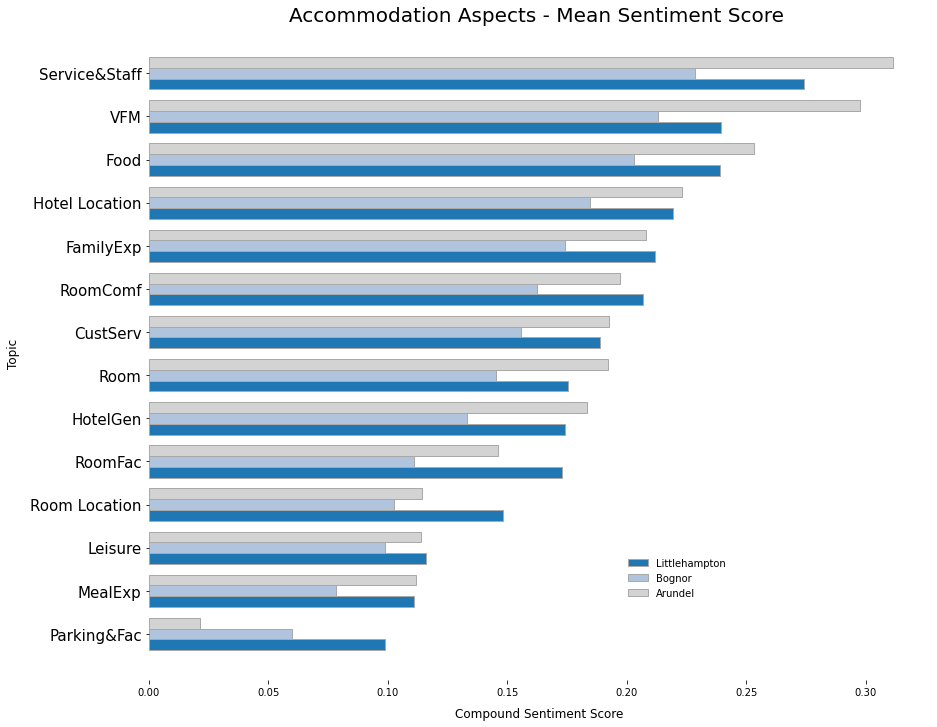

In [211]:
compare_towns(arundel_accom,bognor_accom,little_accom,"Accommodation Aspects")

* Bognor scores the lowest in all categories except Parking & Facilities
* Parking, leisure facilities and meal experiences are among the lowest sentiment scores
* Arundel and Littlehampton score highly for Staff and Service
* Arundel scores highly for value


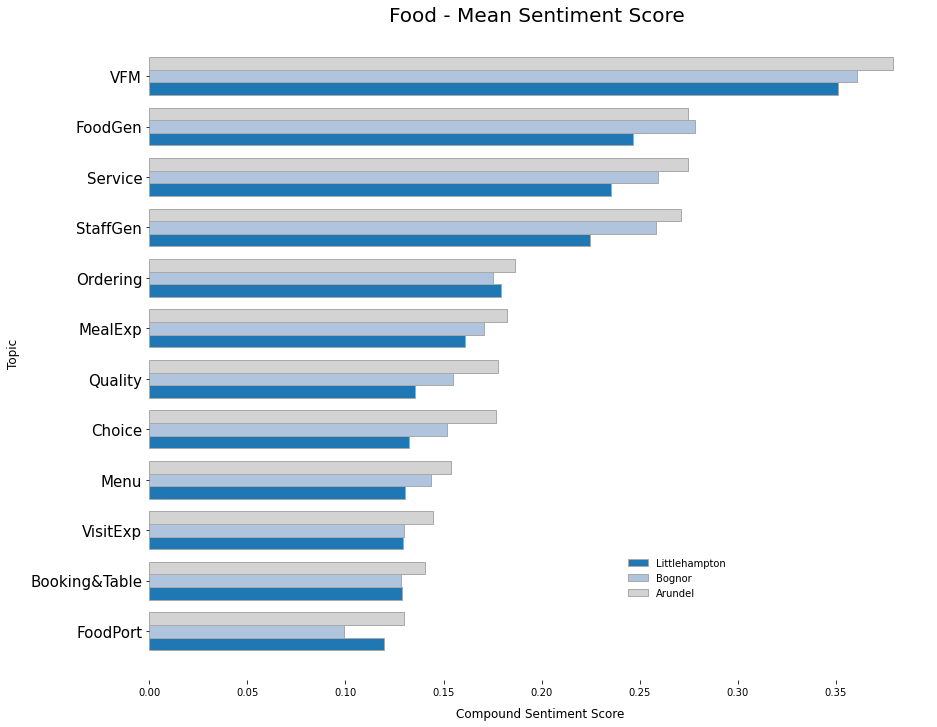

In [212]:
compare_towns(arundel_food,bognor_food,little_food,"Food")

* All towns score highly for value for money with Bognor having the highest average compound sentiment score
* Bognor also scores highest for service
* The lowest scored category is Food Portions and Visit Experience

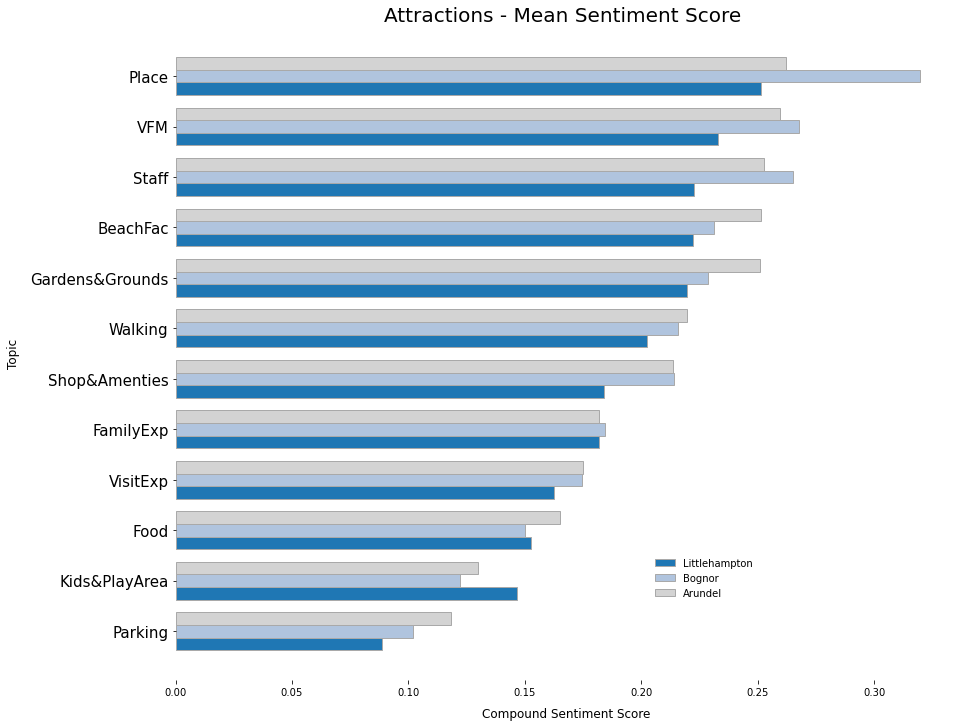

In [213]:
compare_towns(arundel_attract,bognor_attract,little_attract,"Attractions")

* The aspect with the highest mean sentiment score is 'Staff' and Bognor scores the highest of these
* Bognor also scores highest for value for money attractions
* Among the lowest scored aspects relating to attractions are parking, play facilities and food

In [194]:
# Implode dataframe back to sentence level from noun phrase level
#df_comb = df.groupby(["OrigInd","Category","Town","Rating","all_text","sentences","cleaned_sentences"]).agg({'noun_phrases':lambda x: " ".join(x)}).rename({'noun_phrases':'sentence'},axis = 1).reset_index()
#df_comb.drop(columns = ["sentence"],axis = 1,inplace = True)